In [2]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/liver-cirrhosis-stage-classification/liver_cirrhosis.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import joblib

In [4]:
data = pd.read_csv("/kaggle/input/liver-cirrhosis-stage-classification/liver_cirrhosis.csv")

In [35]:
data.head(20)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,1,18499,0,0,1,0,0,0.5,149.000000,4.04,227.000000,598.000000,52.700000,57.000000,256.00000,9.900000,1
1,1230,0,1,19724,1,1,0,1,0,0.5,219.000000,3.93,22.000000,663.000000,45.000000,75.000000,220.00000,10.800000,2
2,4184,0,1,11839,0,0,0,0,0,0.5,320.000000,3.54,51.000000,1243.000000,122.450000,80.000000,225.00000,10.000000,2
3,2090,2,1,16467,0,0,0,0,0,0.7,255.000000,3.74,23.000000,1024.000000,77.500000,58.000000,151.00000,10.200000,2
4,2105,2,1,21699,0,0,1,0,0,1.9,486.000000,3.54,74.000000,1052.000000,108.500000,109.000000,151.00000,11.500000,1
5,4427,0,1,16418,0,0,0,0,0,1.9,259.000000,3.70,281.000000,10396.800000,188.340000,178.000000,327.00000,10.400000,2
6,1418,0,1,23011,0,1,0,1,0,1.3,291.000000,3.44,75.000000,1082.000000,85.000000,195.000000,156.00000,10.300000,2
7,51,2,1,24107,0,1,0,1,2,12.6,200.000000,2.74,140.000000,918.000000,147.250000,143.000000,150.00000,11.100000,3
8,2504,0,1,15265,0,0,0,0,0,2.3,369.510563,3.93,24.000000,1828.000000,133.300000,124.702128,474.00000,10.900000,1
9,1012,2,1,22280,1,1,0,1,1,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,259.00000,10.100000,3


In [6]:
data.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [8]:
data.nunique()

N_Days           549
Status             3
Drug               2
Age              510
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        113
Cholesterol      220
Albumin          179
Copper           197
Alk_Phos         336
SGOT             240
Tryglicerides    157
Platelets        295
Prothrombin       51
Stage              3
dtype: int64

In [9]:
def plot_categorical_distributions(df, categorical_columns):
    # Create subplots
    num_plots = len(categorical_columns)
    fig, axs = plt.subplots(2, 4, figsize=(18, 8))
    
    # Flatten the axs array for easy iteration
    axs = axs.flatten()
    
    for i, column in enumerate(categorical_columns):
        # Check if there are fewer subplots than categorical columns
        if i >= len(axs):
            break
            
        unique_vals = df[column].nunique()
        
        # Plot based on unique values in the column
        if unique_vals <= 5:  # Pie chart
            axs[i].pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
            axs[i].set_title(f'Pie chart of {column}')
        
        elif 5 < unique_vals <= 10:  # Donut chart
            axs[i].pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
            axs[i].add_artist(plt.Circle((0,0), 0.70, fc='white'))
            axs[i].set_title(f'Donut chart of {column}')
        
        elif unique_vals > 10:  # Violin swarm plot
            sns.violinplot(x=column, data=df, ax=axs[i])
            sns.swarmplot(x=column, data=df, color='k', alpha=0.5, ax=axs[i])
            axs[i].set_title(f'Violin Swarm Plot of {column}')
        
        else:  # Strip plot for fallback
            sns.stripplot(x=column, data=df, ax=axs[i])
            axs[i].set_title(f'Strip Plot of {column}')
    
    # Hide any extra subplots if there are fewer than the 2x4 grid (8) slots
    for j in range(num_plots, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

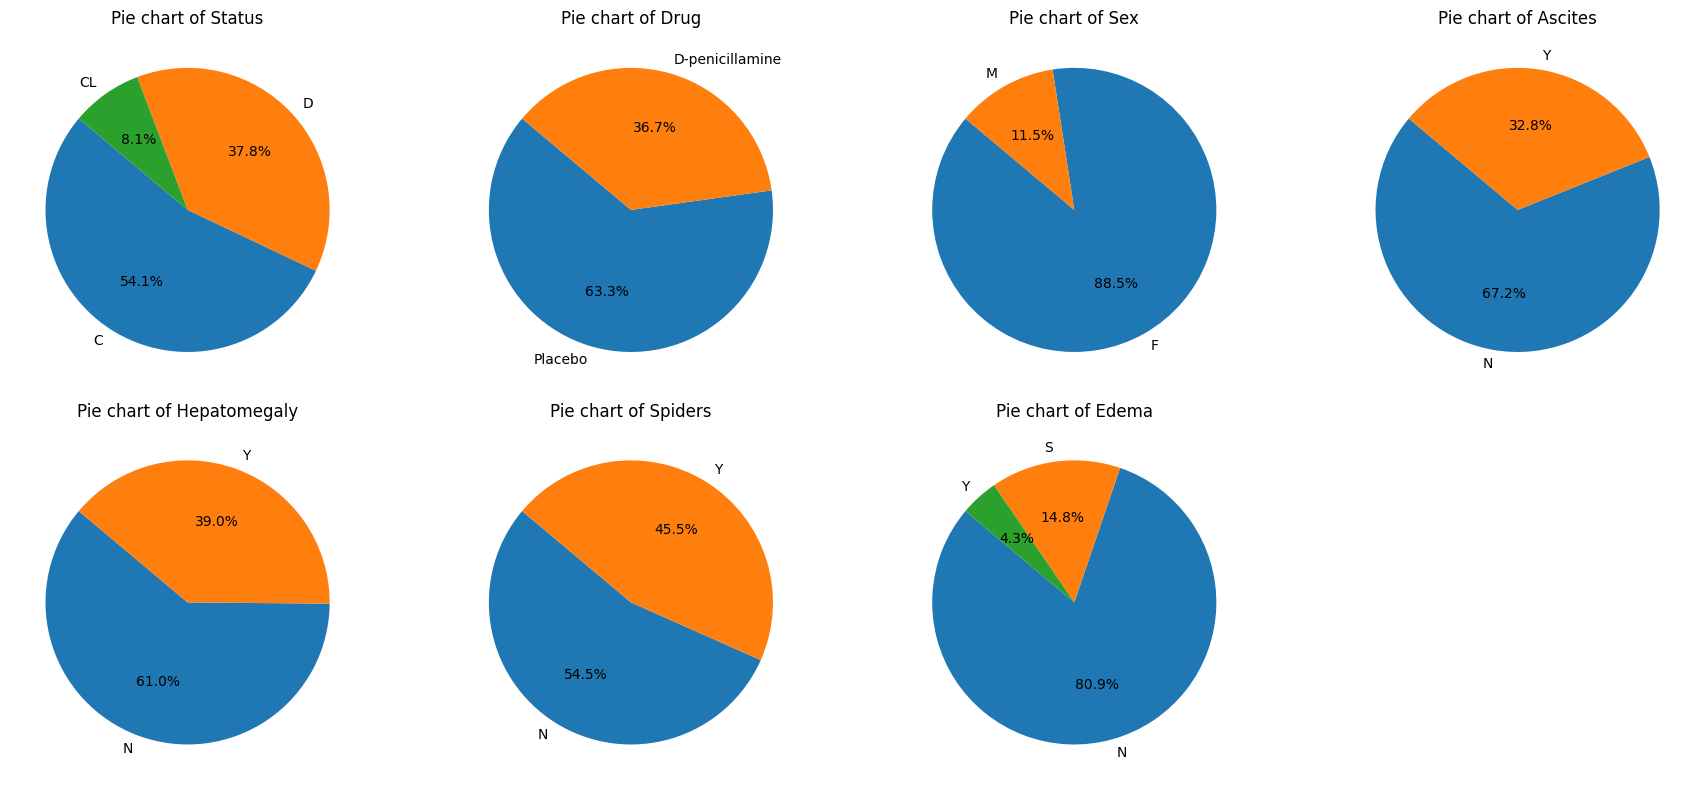

In [10]:
plot_categorical_distributions(data, ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])

for column in ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug', 'Status']:
  data[column] = LabelEncoder().fit_transform(data[column])

In [11]:
#for column in ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug', 'Status']:
#  data[column] = LabelEncoder().fit_transform(data[column])

label_encoders = {}
for column in ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug', 'Status']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store the encoder for later use

In [12]:
data

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,1,18499,0,0,1,0,0,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,0,1,19724,1,1,0,1,0,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,0,1,11839,0,0,0,0,0,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,2,1,16467,0,0,0,0,0,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,2,1,21699,0,0,1,0,0,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,2,0,23612,0,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,2,0,23612,0,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,2,0,16736,0,0,1,1,2,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,0,0,16990,0,0,1,0,0,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [13]:
x = data.drop('Stage', axis=1)
y = data['Stage'] - 1

x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, test_size=0.3, random_state=42)


In [14]:

# Scale numerical features
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)  # Fit and transform training data
x_test_val = scaler.transform(x_test_val)  # Only transform test/validation data


In [23]:
x_train = MinMaxScaler().fit_transform(x_train)
x_test_val = MinMaxScaler().fit_transform(x_test_val)

In [15]:
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.5, random_state=42)

In [16]:
models = {
    'XGBoost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),  # Set probability=True if you want probabilities
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('xgb', XGBClassifier()), 
        ('rf', RandomForestClassifier()), 
        ('gb', GradientBoostingClassifier())
    ], voting='soft')  # Soft voting for probability averages
}

In [17]:
accuracy = {}
best_model = None
best_accuracy = 0

# Train each model and record its accuracy
for name, model in models.items():
    model.fit(x_train, y_train)
    acc = accuracy_score(y_test, model.predict(x_test))
    accuracy[name] = acc

    # Check if this model has the highest accuracy so far
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name

# Convert accuracy dictionary to DataFrame for easier viewing
accuracy_df = pd.DataFrame({
    'Model': list(accuracy.keys()),
    'Accuracy': list(accuracy.values())
})



In [18]:
accuracy_df

,Model,Accuracy
0,XGBoost,0.963733
1,Decision Tree,0.915733
2,Gradient Boosting,0.855733
3,Random Forest,0.954933
4,KNN,0.879733
5,Logistic Regression,0.609867
6,SVM,0.747733
7,Naive Bayes,0.541867
8,AdaBoost,0.693333
9,Extra Trees,0.952267


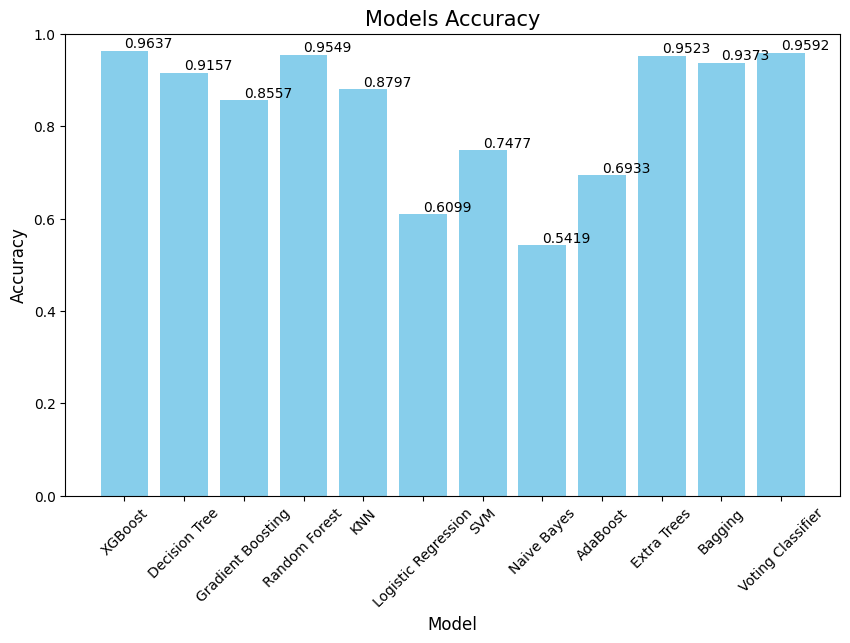

In [19]:
accuracy_melted = accuracy_df.melt(id_vars='Model', var_name='Dataset', value_name='Value')

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(accuracy_melted['Model'], accuracy_melted['Value'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom') # use 'va' for vertical alignment

ax.set_title('Models Accuracy', fontsize=15)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)

plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [21]:
# Save the best model
if best_model:
    # Save the best model
    joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
    print(f"The best model is {best_model_name} with an accuracy of {best_accuracy:.2f}")
    print(f"Model saved as '{best_model_name}_best_model.pkl'")

    # Save the label encoders
    joblib.dump(label_encoders, "label_encoders.pkl")
    print("Label encoders saved as 'label_encoders.pkl'")

    # Save the scaler
    joblib.dump(scaler, "scaler.pkl")
    print("Scaler saved as 'scaler.pkl'")

accuracy_df.sort_values(by="Accuracy", ascending=False, inplace=True)


The best model is XGBoost with an accuracy of 0.96
Model saved as 'XGBoost_best_model.pkl'
Label encoders saved as 'label_encoders.pkl'
Scaler saved as 'scaler.pkl'


In [22]:
def evaluate_model(model, x_test, y_test):
    # Predict labels and probabilities
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test) if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Calculate AUC-ROC for binary or multiclass
    if y_pred_proba is not None:
        if len(set(y_test)) > 2:  # Multiclass case
            auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        else:  # Binary case
            auc_roc = roc_auc_score(y_test, y_pred_proba[:, 1])
    else:
        auc_roc = None  # Set to None if predict_proba is not available
    
    cm = confusion_matrix(y_test, y_pred)
    
    # Return results as a dictionary
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc,
        'Confusion Matrix': cm
    }

In [23]:
model = joblib.load('/kaggle/working/XGBoost_best_model.pkl')
print(f"Model '{best_model_name}' loaded successfully.")

Model 'XGBoost' loaded successfully.


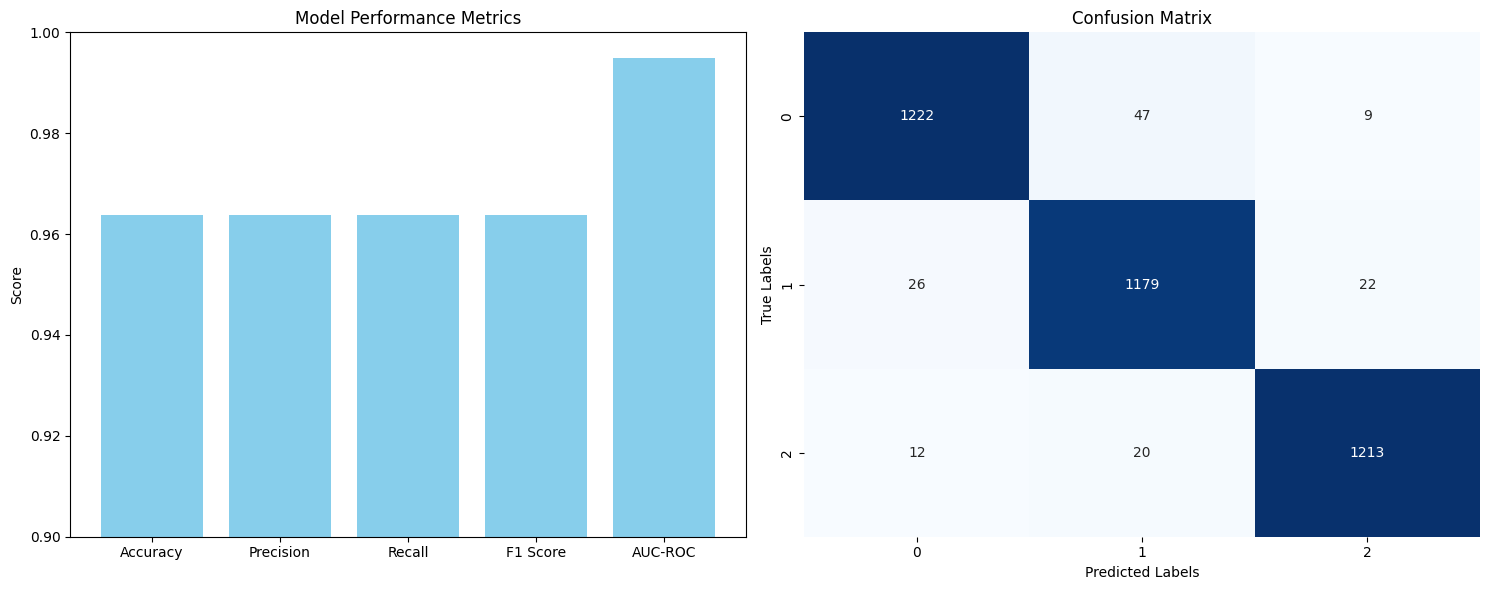

In [24]:

# Metrics dictionary
metrics = evaluate_model(model,x_test,y_test)

# Plot bar chart for the metrics (excluding the Confusion Matrix)
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart for Accuracy, Precision, Recall, F1 Score, and AUC-ROC
metrics_no_matrix = {k: v for k, v in metrics.items() if k != 'Confusion Matrix'}
axs[0].bar(metrics_no_matrix.keys(), metrics_no_matrix.values(), color='skyblue')
axs[0].set_title('Model Performance Metrics')
axs[0].set_ylabel('Score')
axs[0].set_ylim(0.9, 1)  # Optional: Set the y-axis limit for better visual contrast

# Plot the confusion matrix as a heatmap
sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[1])
axs[1].set_title('Confusion Matrix')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


In [46]:
def predict_single_input(input_data):
    # Load the trained model
    model = joblib.load("/kaggle/working/XGBoost_best_model.pkl")
    
    # Load the label encoders and scaler
    label_encoders = joblib.load("/kaggle/working/label_encoders.pkl")  # Assumes you saved your label encoders in a dictionary
    scaler = joblib.load("/kaggle/working/scaler.pkl")
    
    # Prepare the input data
    for column, encoder in label_encoders.items():
        if column in input_data:
            input_data[column] = encoder.transform([input_data[column]])[0]  # Transform the categorical data

    # Convert input data to DataFrame
    input_data_df = pd.DataFrame([input_data])
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data_df)
    
    # Make prediction
    predicted_class = model.predict(input_data_scaled)
    predicted_proba = model.predict_proba(input_data_scaled) if hasattr(model, "predict_proba") else None

    # Get the predicted probability as a percentage for the predicted class
    predicted_proba_percentage = predicted_proba[0][predicted_class[0]] * 100 if predicted_proba is not None else None

    # Return the predicted class and probability as percentage
    return {
        "Predicted Class": predicted_class[0],
        "Predicted Probability (  ": predicted_proba_percentage
    }

In [48]:
new_input = {
    'N_Days': 10,
    'Status': 'D',
    'Drug': 'D-penicillamine',  # Replace with an actual value from your dataset
    'Age': 19450,
    'Sex': 'M',
    'Ascites': 'Y',
    'Hepatomegaly': 'Y',
    'Spiders': 'Y',
    'Edema': 'N',
    'Bilirubin': 1.5,
    'Cholesterol': 180.0,
    'Albumin': 3.5,
    'Copper': 0.9,
    'Alk_Phos': 120.0,
    'SGOT': 35.0,
    'Tryglicerides': 150.0,
    'Platelets': 300.0,
    'Prothrombin': 12.5
}

result = predict_single_input(new_input)
print(result)

{'Predicted Class': 2, 'Predicted Probability (  ': 69.6270763874054}


In [32]:
def predict_single_input(input_data):
    # Load the trained model
    model = joblib.load("/kaggle/working/XGBoost_best_model.pkl")
    
    # Load the label encoders and scaler
    label_encoders = joblib.load("/kaggle/working/label_encoders.pkl")  # Assumes you saved your label encoders in a dictionary
    scaler = joblib.load("/kaggle/working/scaler.pkl")
    
    # Prepare the input data
    for column, encoder in label_encoders.items():
        if column in input_data:
            input_data[column] = encoder.transform([input_data[column]])[0]  # Transform the categorical data

    # Convert input data to DataFrame
    input_data_df = pd.DataFrame([input_data])
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data_df)
    
    # Make prediction
    predicted_class = model.predict(input_data_scaled)
    predicted_proba = model.predict_proba(input_data_scaled) if hasattr(model, "predict_proba") else None

    # Return the predicted class and probabilities
    return {
        "Predicted Class": predicted_class[0],
        "Predicted Probabilities": predicted_proba[0] if predicted_proba is not None else None
    }

# Example usage
new_input = {
    'N_Days': 10,
    'Status': 'D',
    'Drug': 'D-penicillamine',  # Replace with an actual value from your dataset
    'Age': 19450,
    'Sex': 'M',
    'Ascites': 'N',
    'Hepatomegaly': 'Y',
    'Spiders': 'N',
    'Edema': 'N',
    'Bilirubin': 1.5,
    'Cholesterol': 180.0,
    'Albumin': 3.5,
    'Copper': 0.9,
    'Alk_Phos': 120.0,
    'SGOT': 35.0,
    'Tryglicerides': 150.0,
    'Platelets': 300.0,
    'Prothrombin': 12.5
}

result = predict_single_input(new_input)
print(result)

{'Predicted Class': 1, 'Predicted Probabilities': array([0.06420852, 0.55955315, 0.3762383 ], dtype=float32)}
